<a href="https://colab.research.google.com/github/amitverma7426/DataScience/blob/main/Analyzing_data_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext sql

In [ ]:
#in this assignmnet Analyzing a real world data-set with SQL and Python
#Objectives
#After completing this lab you will be able to:

#Understand a dataset of selected socioeconomic indicators in Chicago
#Learn how to store data in an SQLite database.
#Solve example problems to practice your SQL skills

In [ ]:
import csv, sqlite3



In [6]:
 con = sqlite3.connect("socioeconomic.db")
cur = con.cursor()


In [7]:
!pip install -q pandas==1.1.5

In [8]:
%sql sqlite:///socioeconomic.db

In [9]:
import pandas


In [10]:
df = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df.to_sql("chicago_socioeconomic_data", con, if_exists='replace', index=False,method="multi")

78

In [11]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [17]:
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data;


 * sqlite:///socioeconomic.db
Done.


COUNT(*)
78


In [18]:
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data WHERE hardship_index > 50.0;


 * sqlite:///socioeconomic.db
Done.


COUNT(*)
38


In [19]:
%sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data;


 * sqlite:///socioeconomic.db
Done.


MAX(hardship_index)
98.0


In [20]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data where hardship_index=98.0


 * sqlite:///socioeconomic.db
Done.


community_area_name
Riverdale


In [21]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data ORDER BY hardship_index DESC NULLS LAST FETCH FIRST ROW ONLY;


 * sqlite:///socioeconomic.db
(sqlite3.OperationalError) near "FETCH": syntax error
[SQL: SELECT community_area_name FROM chicago_socioeconomic_data ORDER BY hardship_index DESC NULLS LAST FETCH FIRST ROW ONLY;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [22]:
%sql select community_area_name from chicago_socioeconomic_data where hardship_index = ( select max(hardship_index) from chicago_socioeconomic_data )

 * sqlite:///socioeconomic.db
Done.


community_area_name
Riverdale


 * sqlite:///socioeconomic.db
Done.


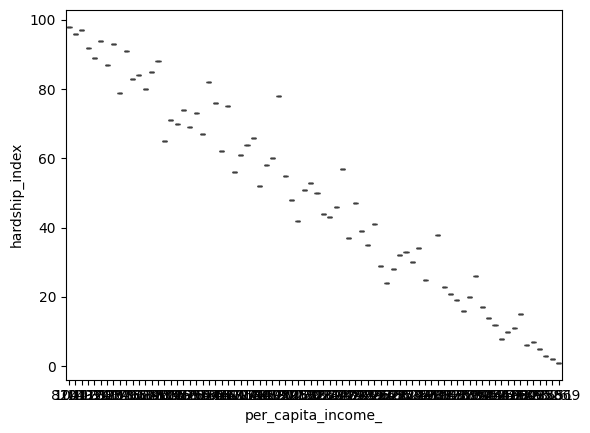

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.boxplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())
